In [32]:
import pandas as pd
import numpy as np

#libraries de presentations:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotnine import *
from mpl_toolkits.mplot3d import Axes3D

#libraries tests statistiques:
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats

#ACP:
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [33]:
df= pd.read_csv("C:\\Users\\Lama\\Desktop\\dataviz\\data_tot5_viz.csv",decimal=".", index_col=0)

# 1.pretraintement et analyse generale de notre jeu de données:

In [34]:
#afficher le nom  des colonnes:
df.columns

Index(['Row.names', 'CLINIC.OS_MONTHS', 'CLINIC.OS_STATUS', 'CLINIC.study',
       'EXP.A1CF', 'EXP.ABI1', 'EXP.ABL1', 'EXP.ABL2', 'EXP.ACKR3',
       'EXP.ACSL3',
       ...
       'EXP.ZFHX3', 'EXP.ZMYM2', 'EXP.ZMYM3', 'EXP.ZNF331', 'EXP.ZNF384',
       'EXP.ZNF429', 'EXP.ZNF479', 'EXP.ZNF521', 'EXP.ZNRF3', 'EXP.ZRSR2'],
      dtype='object', length=719)

In [35]:
df.head()
#les données sont deja normalisées

Row.names  CLINIC.OS_MONTHS CLINIC.OS_STATUS CLINIC.study  EXP.A1CF  \
1  TCGA.2A.A8VL.01               NaN              NaN         prad  0.000000   
2  TCGA.2A.A8VO.01             55.88         0:LIVING         prad  0.000000   
3  TCGA.2A.A8VT.01             45.11         0:LIVING         prad  0.024106   
4  TCGA.2A.A8VV.01             22.04         0:LIVING         prad  0.000000   
5  TCGA.2A.A8VX.01             45.27         0:LIVING         prad  0.000000   

   EXP.ABI1  EXP.ABL1  EXP.ABL2  EXP.ACKR3  EXP.ACSL3  ...  EXP.ZFHX3  \
1  0.541512  0.604870  0.482775   0.347875   0.712888  ...   0.593948   
2  0.547076  0.586030  0.483318   0.405532   0.657795  ...   0.578088   
3  0.528198  0.608390  0.533721   0.398137   0.707258  ...   0.575769   
4  0.560709  0.618023  0.488945   0.335193   0.712310  ...   0.597133   
5  0.559985  0.589078  0.491609   0.374201   0.647905  ...   0.598723   

   EXP.ZMYM2  EXP.ZMYM3  EXP.ZNF331  EXP.ZNF384  EXP.ZNF429  EXP.ZNF479  \
1   0.582641   0.543210    0.550739    0.537858    0.358376         0.0   
2   0.570839   0.527535    0.490828    0.540194    0.405532         0.0   
3   0.623860   0.573462    0.536545    0.514434    0.423990         0.0   
4   0.593029   0.517719    0.501318    0.537783    0.402182         0.0   
5   0.551116   0.544028    0.500094    0.556937    0.368586         0.0   

   EXP.ZNF521  EXP.ZNRF3  EXP.ZRSR2  
1    0.309384   0.510466   0.406082  
2    0.319607   0.496463   0.445130  
3    0.288131   0.496563   0.407799  
4    0.342315   0.517282   0.413263  
5    0.248426   0.591119   0.438886  

[5 rows x 719 columns]

In [36]:
df.shape

(1456, 719)

In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
#on va s'interesser dans ce projet à la variable cible CLINIC.study 
#donc on va supprimer les variables CLINIC.OS_STATUS et CLINIC.OS_MONTHS
df=df.drop(['CLINIC.OS_STATUS','CLINIC.OS_MONTHS','Row.names'], axis=1)

df.head()

CLINIC.study  EXP.A1CF  EXP.ABI1  EXP.ABL1  EXP.ABL2  EXP.ACKR3  EXP.ACSL3  \
1         prad  0.000000  0.541512  0.604870  0.482775   0.347875   0.712888   
2         prad  0.000000  0.547076  0.586030  0.483318   0.405532   0.657795   
3         prad  0.024106  0.528198  0.608390  0.533721   0.398137   0.707258   
4         prad  0.000000  0.560709  0.618023  0.488945   0.335193   0.712310   
5         prad  0.000000  0.559985  0.589078  0.491609   0.374201   0.647905   

   EXP.ACSL6  EXP.ACVR1  EXP.ACVR2A  ...  EXP.ZFHX3  EXP.ZMYM2  EXP.ZMYM3  \
1   0.125749   0.500824    0.457611  ...   0.593948   0.582641   0.543210   
2   0.208305   0.462957    0.472713  ...   0.578088   0.570839   0.527535   
3   0.266585   0.533194    0.463842  ...   0.575769   0.623860   0.573462   
4   0.134106   0.494678    0.470423  ...   0.597133   0.593029   0.517719   
5   0.053670   0.460583    0.496246  ...   0.598723   0.551116   0.544028   

   EXP.ZNF331  EXP.ZNF384  EXP.ZNF429  EXP.ZNF479  EXP.ZNF521  EXP.ZNRF3  \
1    0.550739    0.537858    0.358376         0.0    0.309384   0.510466   
2    0.490828    0.540194    0.405532         0.0    0.319607   0.496463   
3    0.536545    0.514434    0.423990         0.0    0.288131   0.496563   
4    0.501318    0.537783    0.402182         0.0    0.342315   0.517282   
5    0.500094    0.556937    0.368586         0.0    0.248426   0.591119   

   EXP.ZRSR2  
1   0.406082  
2   0.445130  
3   0.407799  
4   0.413263  
5   0.438886  

[5 rows x 716 columns]

In [39]:
#missing data
#on a pas de valeurs manquantes
# Nombre total de valeurs manquantes
print(df.isnull().sum().sum())

0


In [40]:
#nombre d'observation pour chaque type de cancer:
df['CLINIC.study'].value_counts()
#prad=prostate
#paad=pancreas
#brca=Sein

brca    816
prad    491
paad    149
Name: CLINIC.study, dtype: int64

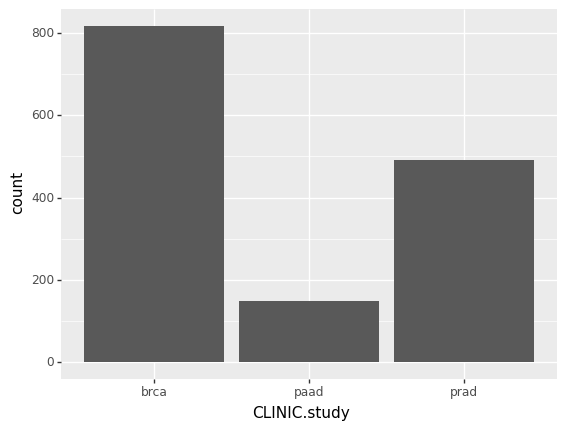

<ggplot: (142155836913)>

In [41]:
#histogramme d'observation pour chaque type de cancer:


(ggplot(df, aes(x='CLINIC.study')) + \
    geom_bar(stat = 'count')
)

In [42]:
X=df.drop(['CLINIC.study'], axis=1)
X

EXP.A1CF  EXP.ABI1  EXP.ABL1  EXP.ABL2  EXP.ACKR3  EXP.ACSL3  EXP.ACSL6  \
1     0.000000  0.541512  0.604870  0.482775   0.347875   0.712888   0.125749   
2     0.000000  0.547076  0.586030  0.483318   0.405532   0.657795   0.208305   
3     0.024106  0.528198  0.608390  0.533721   0.398137   0.707258   0.266585   
4     0.000000  0.560709  0.618023  0.488945   0.335193   0.712310   0.134106   
5     0.000000  0.559985  0.589078  0.491609   0.374201   0.647905   0.053670   
...        ...       ...       ...       ...        ...        ...        ...   
1452  0.000000  0.559250  0.623345  0.516899   0.400225   0.588526   0.240718   
1453  0.000000  0.558034  0.612417  0.500689   0.461815   0.590283   0.181130   
1454  0.000000  0.551856  0.593140  0.525267   0.401069   0.608822   0.161938   
1455  0.000000  0.532657  0.618559  0.485027   0.401104   0.653819   0.102120   
1456  0.346859  0.538288  0.616085  0.473884   0.460049   0.650160   0.070649   

      EXP.ACVR1  EXP.ACVR2A  EXP.AFDN  ...  EXP.ZFHX3  EXP.ZMYM2  EXP.ZMYM3  \
1      0.500824    0.457611  0.653970  ...   0.593948   0.582641   0.543210   
2      0.462957    0.472713  0.610044  ...   0.578088   0.570839   0.527535   
3      0.533194    0.463842  0.635984  ...   0.575769   0.623860   0.573462   
4      0.494678    0.470423  0.626111  ...   0.597133   0.593029   0.517719   
5      0.460583    0.496246  0.622077  ...   0.598723   0.551116   0.544028   
...         ...         ...       ...  ...        ...        ...        ...   
1452   0.550710    0.464334  0.627647  ...   0.516619   0.583308   0.559169   
1453   0.539011    0.455220  0.615302  ...   0.561513   0.579024   0.549508   
1454   0.485093    0.480452  0.608120  ...   0.512136   0.596186   0.547053   
1455   0.429514    0.443638  0.637753  ...   0.534660   0.530551   0.553452   
1456   0.471891    0.494001  0.530133  ...   0.564359   0.518039   0.535893   

      EXP.ZNF331  EXP.ZNF384  EXP.ZNF429  EXP.ZNF479  EXP.ZNF521  EXP.ZNRF3  \
1       0.550739    0.537858    0.358376         0.0    0.309384   0.510466   
2       0.490828    0.540194    0.405532         0.0    0.319607   0.496463   
3       0.536545    0.514434    0.423990         0.0    0.288131   0.496563   
4       0.501318    0.537783    0.402182         0.0    0.342315   0.517282   
5       0.500094    0.556937    0.368586         0.0    0.248426   0.591119   
...          ...         ...         ...         ...         ...        ...   
1452    0.439970    0.548196    0.417432         0.0    0.420147   0.462654   
1453    0.501950    0.550453    0.382225         0.0    0.397555   0.496226   
1454    0.467910    0.515733    0.401069         0.0    0.252874   0.439713   
1455    0.492930    0.519494    0.371673         0.0    0.263781   0.422565   
1456    0.485396    0.545587    0.342920         0.0    0.389124   0.452154   

      EXP.ZRSR2  
1      0.406082  
2      0.445130  
3      0.407799  
4      0.413263  
5      0.438886  
...         ...  
1452   0.462896  
1453   0.428703  
1454   0.457001  
1455   0.396607  
1456   0.434658  

[1456 rows x 715 columns]

In [43]:
X.describe()

EXP.A1CF     EXP.ABI1     EXP.ABL1     EXP.ABL2    EXP.ACKR3  \
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000   
mean      0.037833     0.532702     0.568331     0.503167     0.425122   
std       0.085857     0.020385     0.035233     0.025438     0.061353   
min       0.000000     0.422011     0.463623     0.409862     0.202742   
25%       0.000000     0.520116     0.543055     0.486747     0.386290   
50%       0.000000     0.532604     0.562313     0.503252     0.425386   
75%       0.023900     0.545170     0.598918     0.520271     0.465656   
max       0.421644     0.645653     0.671399     0.598201     0.662149   

         EXP.ACSL3    EXP.ACSL6    EXP.ACVR1   EXP.ACVR2A     EXP.AFDN  ...  \
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000  ...   
mean      0.611159     0.167227     0.491077     0.432410     0.578563  ...   
std       0.060148     0.074171     0.027944     0.040318     0.051388  ...   
min       0.466746     0.000000     0.372165     0.245780     0.000000  ...   
25%       0.566993     0.118381     0.473830     0.404353     0.545182  ...   
50%       0.600013     0.159049     0.493673     0.435454     0.576210  ...   
75%       0.653619     0.204438     0.510115     0.463380     0.614032  ...   
max       0.792991     0.531884     0.581760     0.545464     0.721779  ...   

         EXP.ZFHX3    EXP.ZMYM2    EXP.ZMYM3   EXP.ZNF331   EXP.ZNF384  \
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000   
mean      0.512578     0.548009     0.509514     0.459864     0.514846   
std       0.059438     0.034008     0.032106     0.047122     0.022611   
min       0.298877     0.393105     0.307311     0.298418     0.439258   
25%       0.472418     0.524510     0.486751     0.426294     0.500265   
50%       0.502954     0.547262     0.507423     0.452773     0.512905   
75%       0.557724     0.571447     0.533615     0.496102     0.531650   
max       0.660658     0.674453     0.595592     0.614205     0.631965   

        EXP.ZNF429   EXP.ZNF479   EXP.ZNF521    EXP.ZNRF3    EXP.ZRSR2  
count  1456.000000  1456.000000  1456.000000  1456.000000  1456.000000  
mean      0.374972     0.001899     0.387479     0.444851     0.408354  
std       0.042762     0.010477     0.076246     0.054030     0.026047  
min       0.163207     0.000000     0.089539     0.295117     0.281012  
25%       0.352445     0.000000     0.339043     0.404641     0.392619  
50%       0.381954     0.000000     0.387445     0.439991     0.407826  
75%       0.403899     0.000000     0.442924     0.483340     0.423835  
max       0.471469     0.173886     0.597351     0.618361     0.512351  

[8 rows x 715 columns]

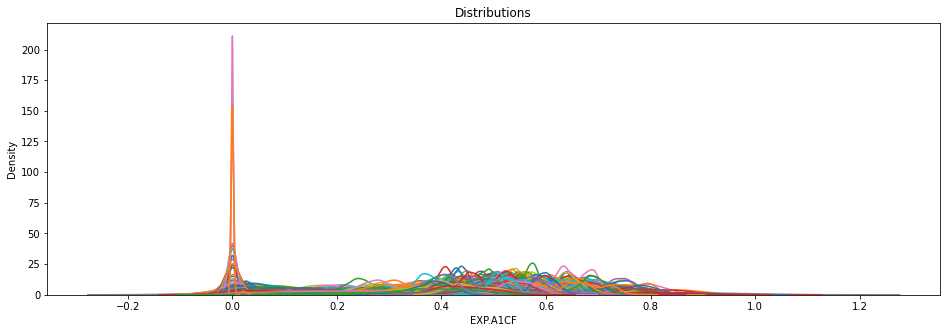

In [44]:

fig, a = plt.subplots(ncols=1, figsize=(16, 5))
a.set_title("Distributions")
for col in X.columns:
    sns.kdeplot(X[col], ax=a)
plt.show()


Skewness: 0.184059
Kurtosis: 1.907057


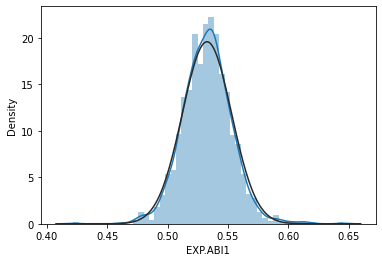

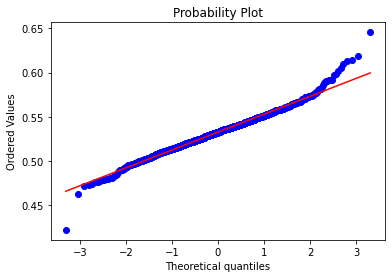

In [45]:
#histogram and normal probability plot
sns.distplot(df['EXP.ABI1'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['EXP.ABI1'], plot=plt)
print("Skewness: %f" % df['EXP.ABI1'].skew())
print("Kurtosis: %f" % df['EXP.ABI1'].kurt())



Skewness: 2.541094
Kurtosis: 5.370337


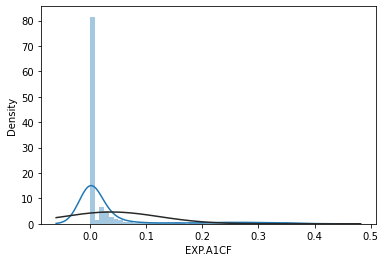

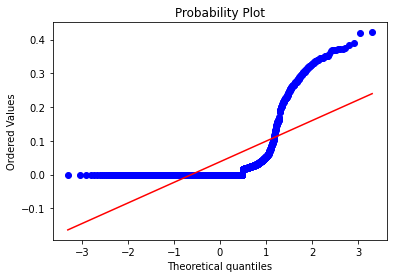

In [46]:
#histogram and normal probability plot
sns.distplot(df['EXP.A1CF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['EXP.A1CF'], plot=plt)
print("Skewness: %f" % df['EXP.A1CF'].skew())
print("Kurtosis: %f" % df['EXP.A1CF'].kurt())



In [47]:
#afficher la matrice de correlation entre les genes:
pw_corr=pd.DataFrame(X).corr().round(3)
print(pw_corr)

            EXP.A1CF  EXP.ABI1  EXP.ABL1  EXP.ABL2  EXP.ACKR3  EXP.ACSL3  \
EXP.A1CF       1.000     0.062    -0.011    -0.094      0.125     -0.253   
EXP.ABI1       0.062     1.000     0.230     0.168     -0.144      0.281   
EXP.ABL1      -0.011     0.230     1.000     0.034     -0.217      0.587   
EXP.ABL2      -0.094     0.168     0.034     1.000      0.229     -0.064   
EXP.ACKR3      0.125    -0.144    -0.217     0.229      1.000     -0.388   
...              ...       ...       ...       ...        ...        ...   
EXP.ZNF429    -0.333     0.076     0.290     0.095     -0.207      0.456   
EXP.ZNF479    -0.021    -0.032    -0.056    -0.006      0.024     -0.001   
EXP.ZNF521    -0.008    -0.036    -0.346     0.366      0.460     -0.478   
EXP.ZNRF3     -0.073     0.214     0.578    -0.023     -0.274      0.598   
EXP.ZRSR2     -0.010    -0.239    -0.044    -0.228     -0.087     -0.116   

            EXP.ACSL6  EXP.ACVR1  EXP.ACVR2A  EXP.AFDN  ...  EXP.ZFHX3  \
EXP.A1CF     

verifier que le gene responsable du cancer de prostate et Pancreas(BRCA2 selon l'etude canadienne) est corrélé avec le type du cancer:

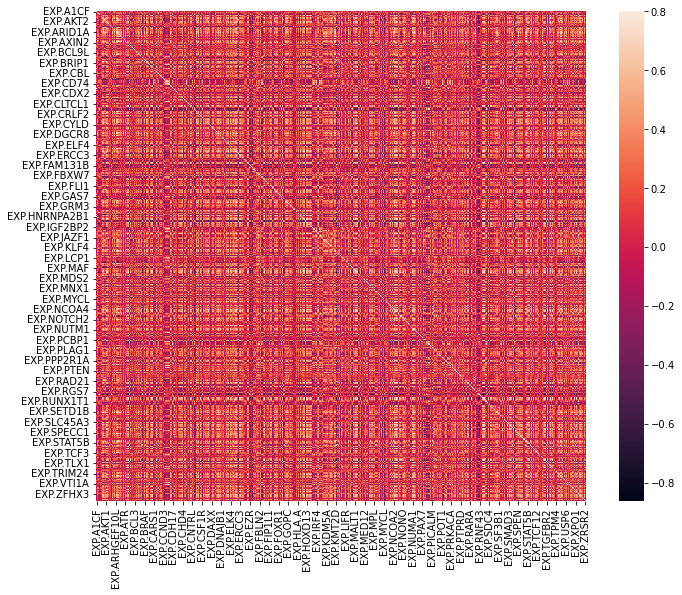

In [48]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# 2.Developpeemnt de l'etude canadienne

Skewness: -0.473082
Kurtosis: 0.036200


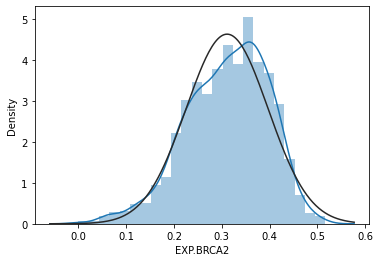

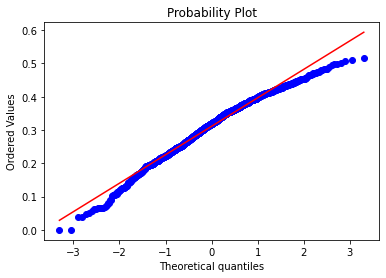

In [49]:
#histogram and normal probability plot
sns.distplot(df['EXP.BRCA2'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['EXP.BRCA2'], plot=plt)
print("Skewness: %f" % df['EXP.BRCA2'].skew())
print("Kurtosis: %f" % df['EXP.BRCA2'].kurt())


In [50]:
#ANOVA (F-TEST) quanti-quali
df_anova = df[['EXP.BRCA2','CLINIC.study']]
grps = pd.unique(df['CLINIC.study'].values)
print(grps)

['prad' 'paad' 'brca']


In [51]:
#ANOVA (F-TEST) 
df_anova = df
df_anova = df_anova[['EXP.BRCA2','CLINIC.study']]
grps = pd.unique(df_anova['CLINIC.study'].values)
print(grps)
d_data = {grp:df_anova['EXP.BRCA2'][df_anova['CLINIC.study'] == grp] for grp in grps}

['prad' 'paad' 'brca']


In [52]:
F, p = f_oneway(d_data['prad'], d_data['paad'])
print("p-value for significance is: ", p)
if p<0.05:
    print("rejeter les hypotheses nulles")
else:
    print("accepter les hypotheses nulles")

p-value for significance is:  1.8787265068554717e-46
rejeter les hypotheses nulles


l'hypothèse nulle met en évidence l'égalité des moyennes : la variable qualitative n'a aucune influence sur la variable quantitative.
enrejettnat cette hypothese on justifie la relation entre les deux variables

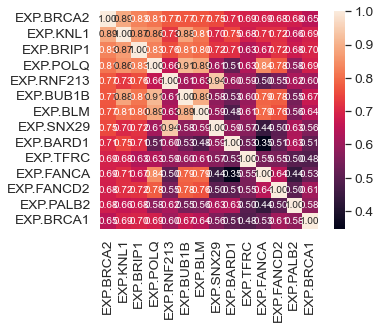

In [53]:
#les 14 les plus corrélées avec BRCA2:

k = 14 #number of variables for heatmap
cols = corrmat.nlargest(k, 'EXP.BRCA2')['EXP.BRCA2'].index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

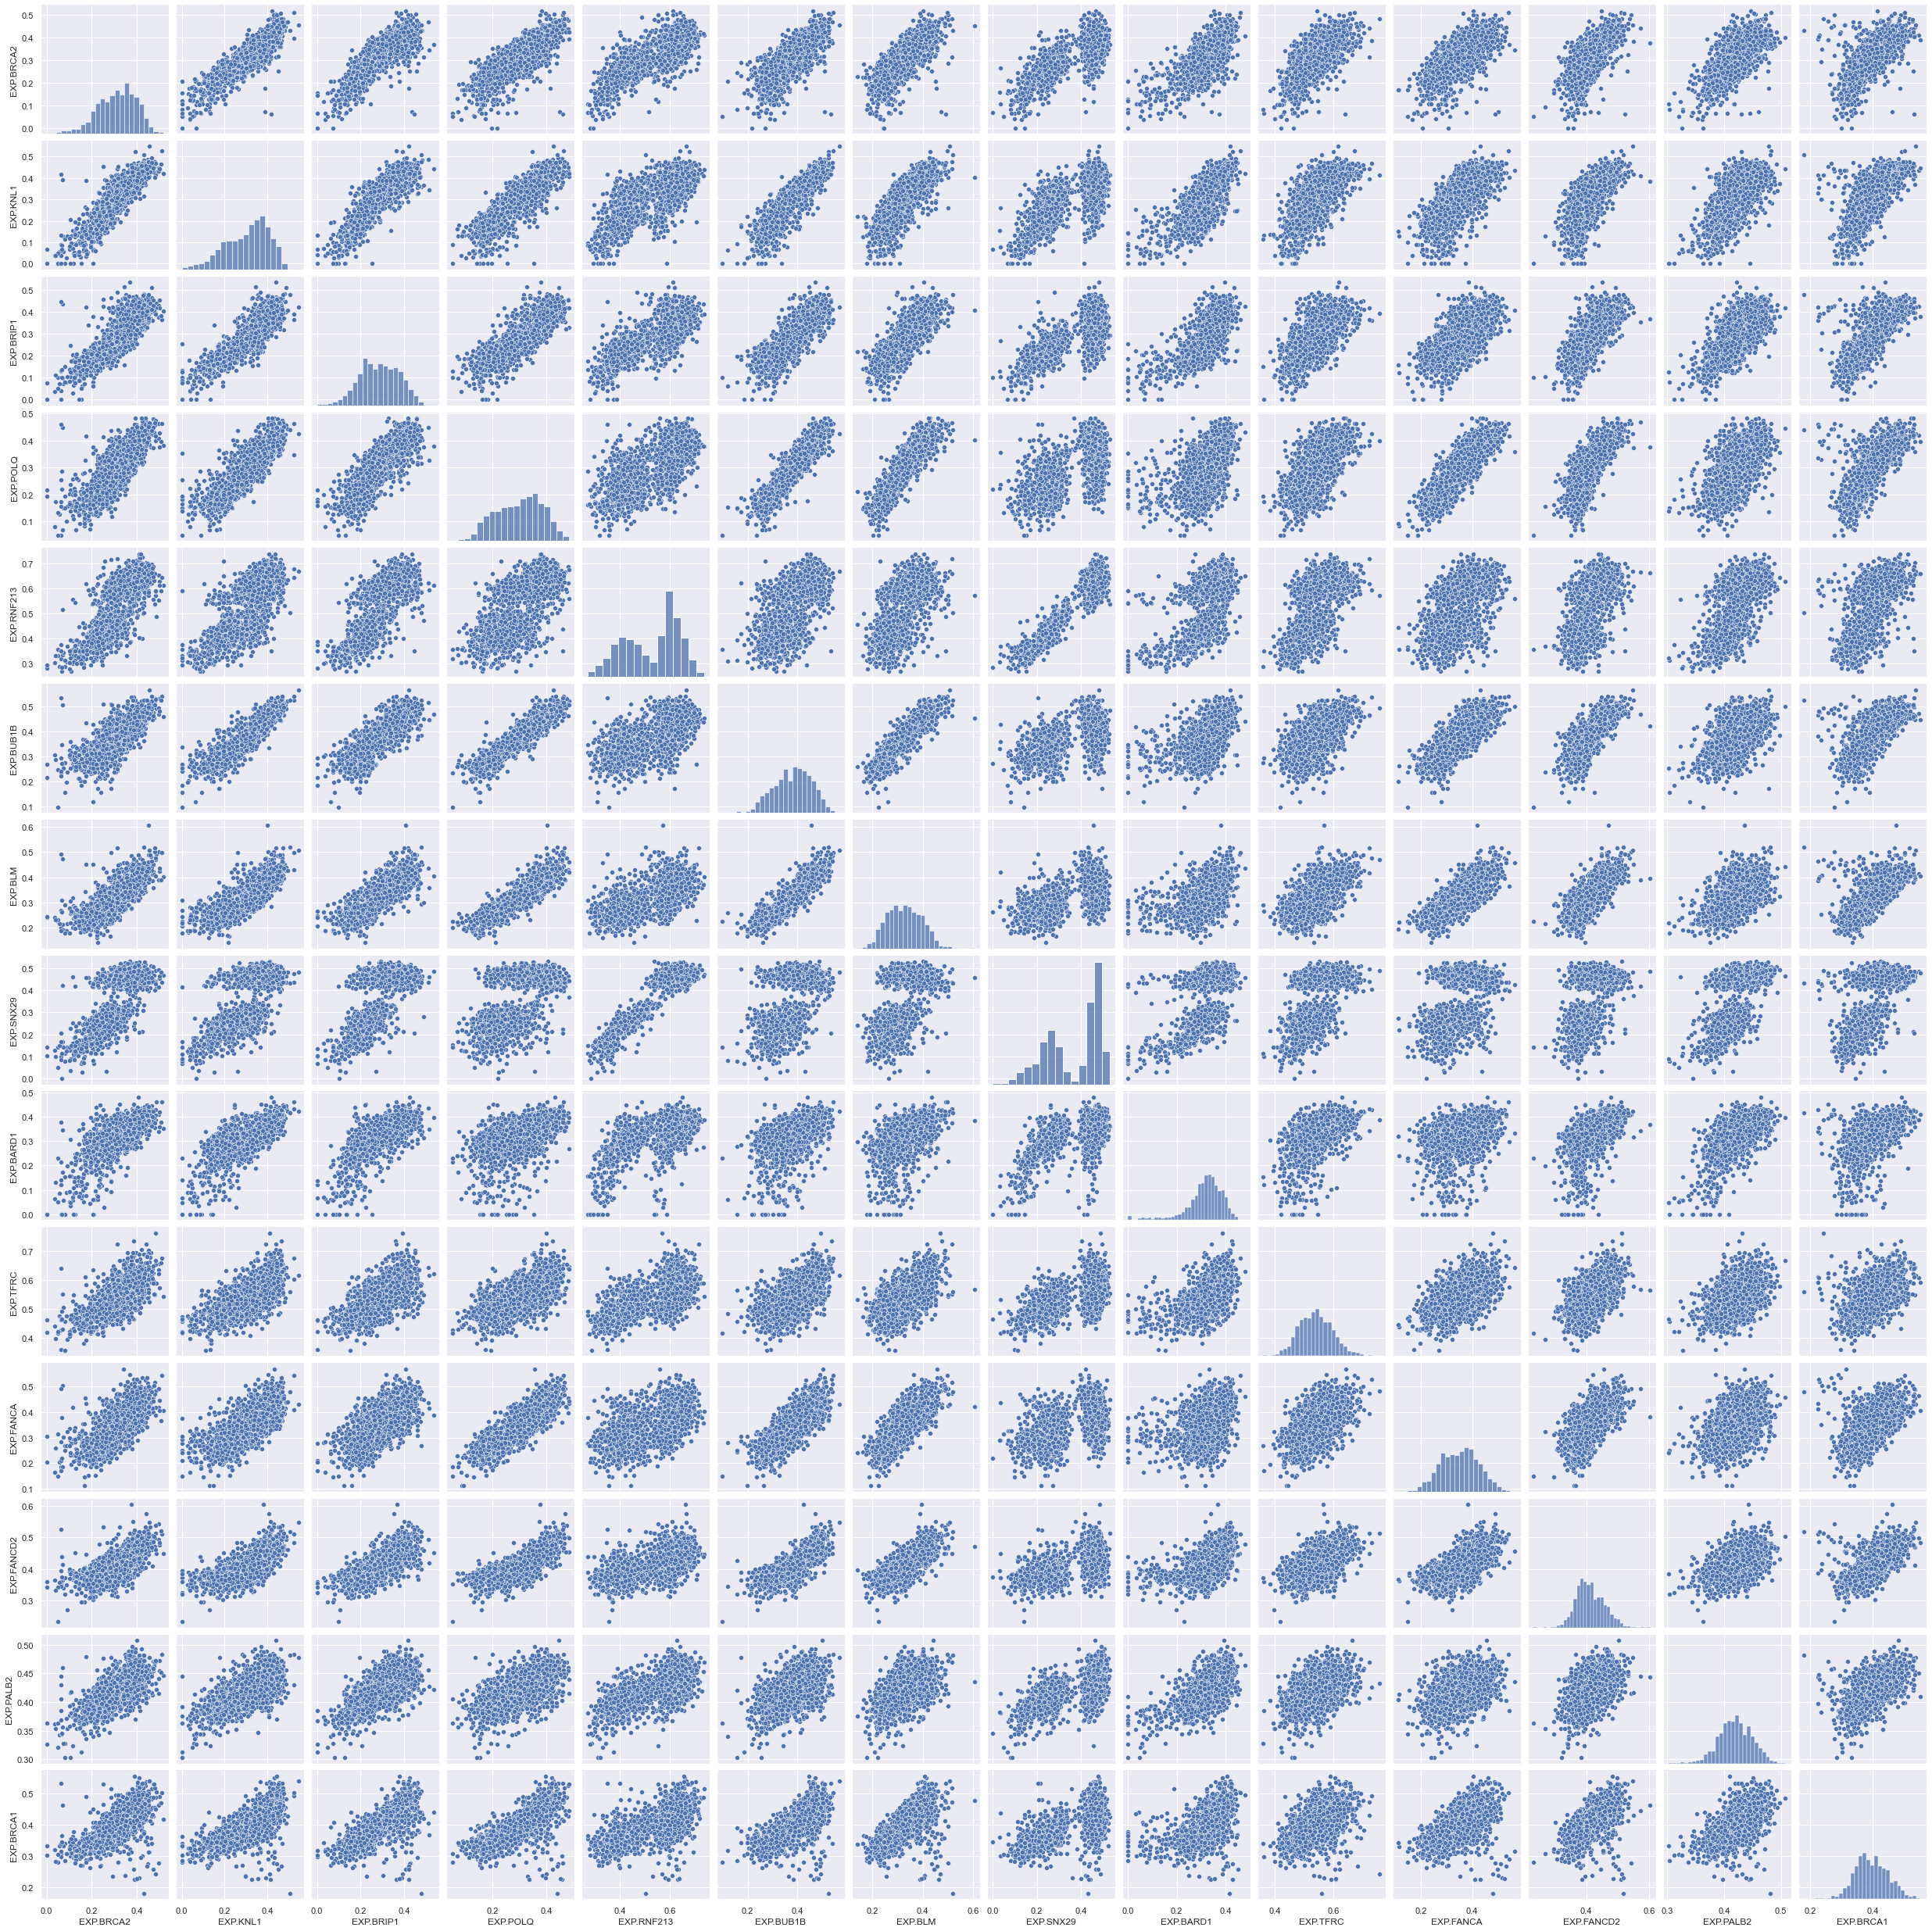

In [54]:
sns.set()
cols = [ 'EXP.BRCA2', 'EXP.KNL1', 'EXP.BRIP1','EXP.POLQ','EXP.RNF213','EXP.BUB1B','EXP.BLM','EXP.SNX29','EXP.BARD1','EXP.TFRC','EXP.FANCA','EXP.FANCD2','EXP.PALB2','EXP.BRCA1']
sns.pairplot(df[cols], size = 2.5)
plt.show();




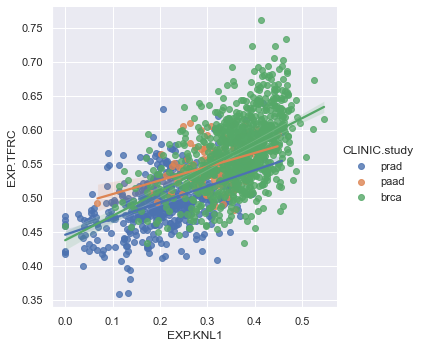

In [55]:
sns.lmplot(x="EXP.KNL1", y="EXP.TFRC", hue="CLINIC.study", data=df)

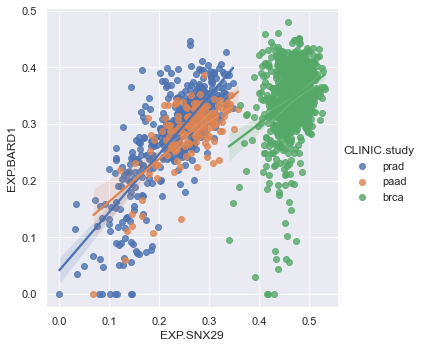

In [56]:
sns.lmplot(x="EXP.SNX29", y="EXP.BARD1", hue="CLINIC.study", data=df)

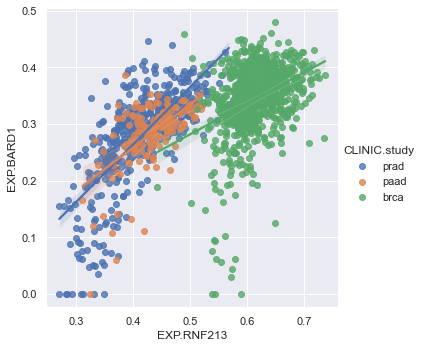

In [57]:
sns.lmplot(x="EXP.RNF213", y="EXP.BARD1", hue="CLINIC.study", data=df)

p-value= 0.0
[[1.         0.93636739]
 [0.93636739 1.        ]]


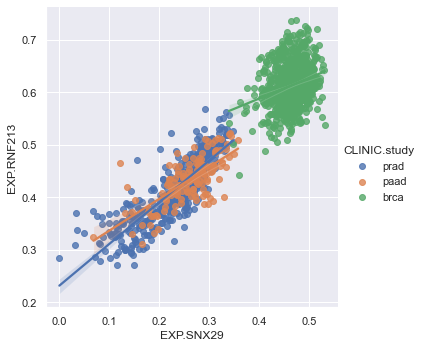

In [58]:
sns.lmplot(x="EXP.SNX29", y="EXP.RNF213", hue="CLINIC.study", data=df)
r,p=pearsonr(df['EXP.SNX29'],df['EXP.RNF213'])
print('p-value=',p)
#autre méthode
my_rho = np.corrcoef(df['EXP.SNX29'], df['EXP.RNF213'])
print(my_rho)

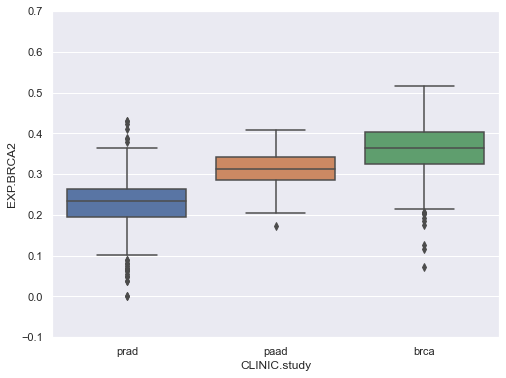

In [59]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.BRCA2'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.BRCA2", data=df)
fig.axis(ymin=-0.1, ymax=0.7);

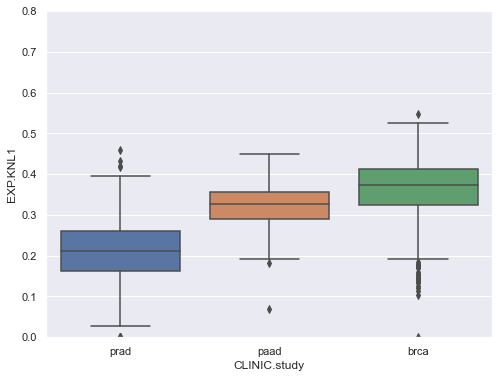

In [60]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.KNL1'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.KNL1", data=df)
fig.axis(ymin=0, ymax=0.8);


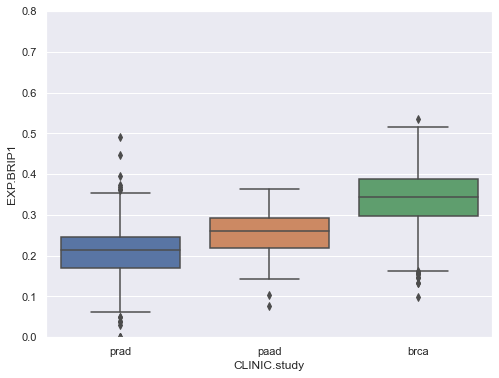

In [61]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.BRIP1'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.BRIP1", data=df)
fig.axis(ymin=0, ymax=0.8);


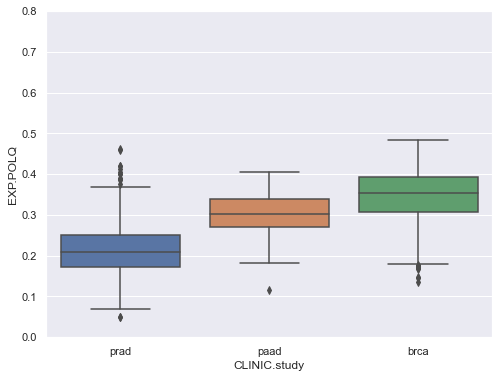

In [62]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.POLQ'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.POLQ", data=df)
fig.axis(ymin=0, ymax=0.8);


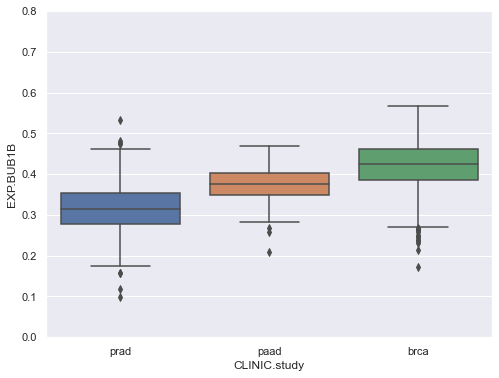

In [63]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.BUB1B'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.BUB1B", data=df)
fig.axis(ymin=0, ymax=0.8);


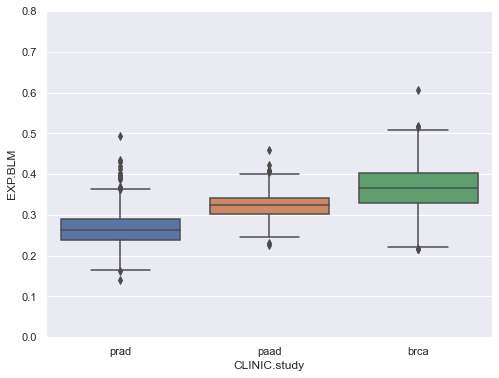

In [64]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.BLM'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.BLM", data=df)
fig.axis(ymin=0, ymax=0.8);


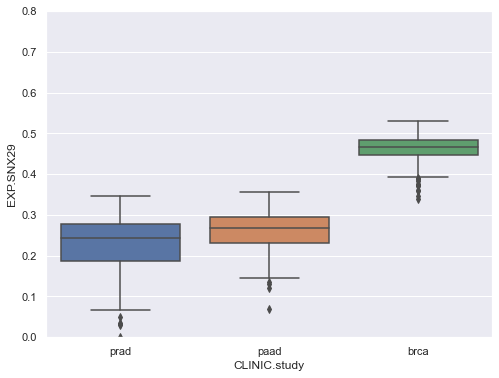

In [65]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.SNX29'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.SNX29", data=df)
fig.axis(ymin=0, ymax=0.8);


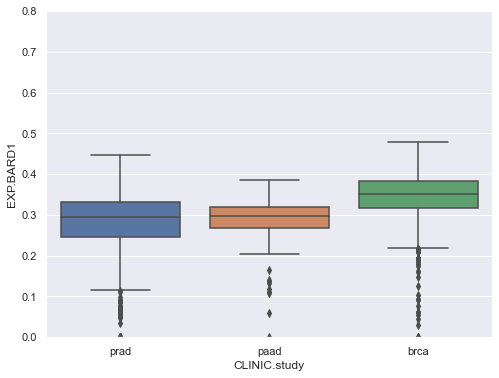

In [66]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.BARD1'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.BARD1", data=df)
fig.axis(ymin=0, ymax=0.8);


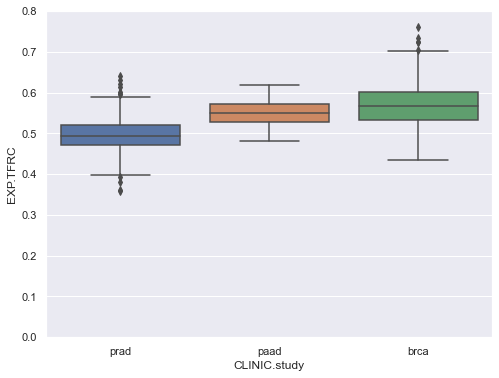

In [67]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.TFRC'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.TFRC", data=df)
fig.axis(ymin=0, ymax=0.8);


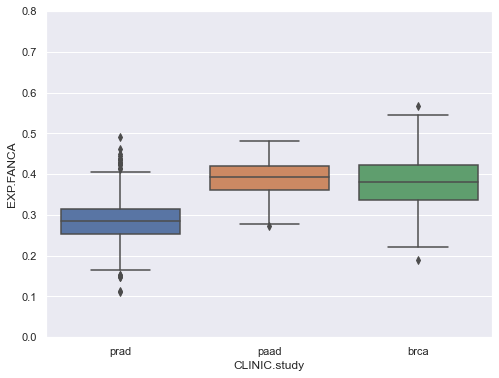

In [68]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.FANCA'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.FANCA", data=df)
fig.axis(ymin=0, ymax=0.8);


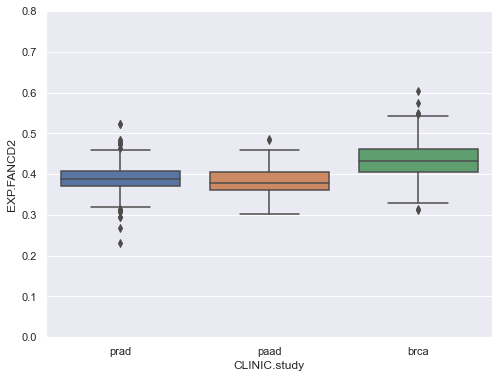

In [69]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.FANCD2'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.FANCD2", data=df)
fig.axis(ymin=0, ymax=0.8);


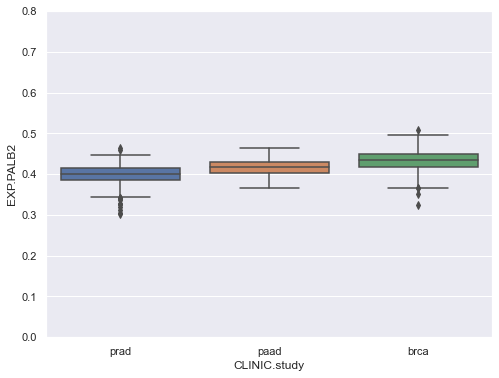

In [70]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.PALB2'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.PALB2", data=df)
fig.axis(ymin=0, ymax=0.8);


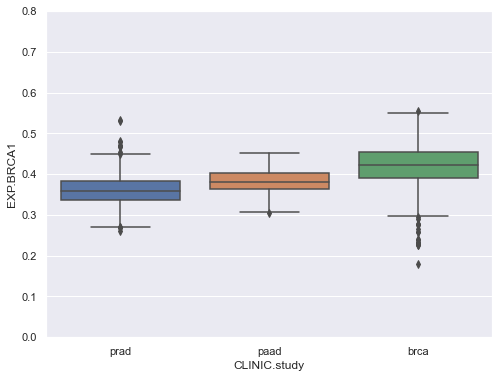

In [71]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.BRCA1'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.BRCA1", data=df)
fig.axis(ymin=0, ymax=0.8);

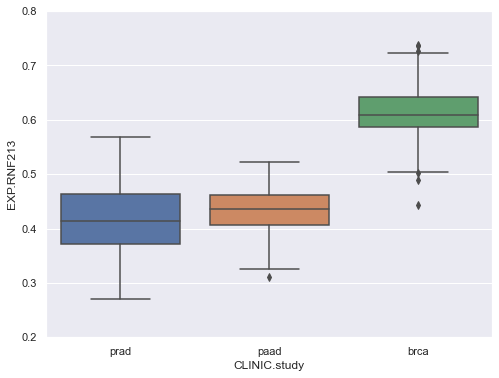

In [72]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.RNF213'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.RNF213", data=df)
fig.axis(ymin=0.2, ymax=0.8);

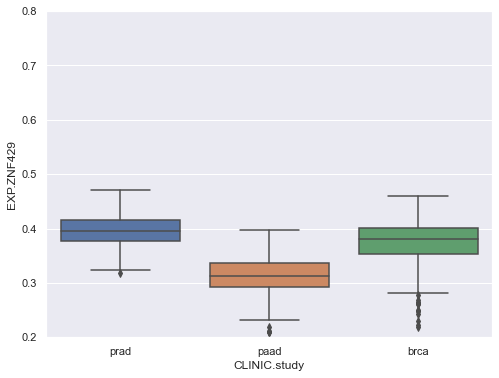

In [73]:
var = 'CLINIC.study'
data = pd.concat([df['EXP.ZNF429'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="EXP.ZNF429", data=df)
fig.axis(ymin=0.2, ymax=0.8);

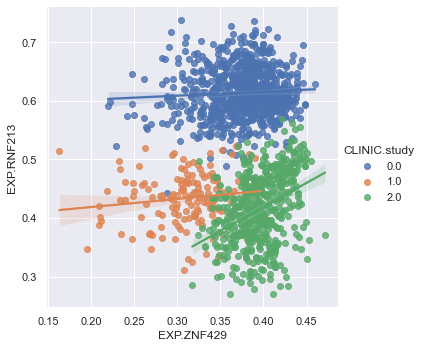

In [89]:
sns.lmplot(x="EXP.ZNF429", y="EXP.RNF213", hue="CLINIC.study", data=df)

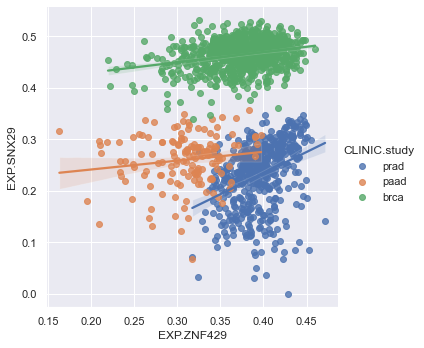

In [75]:
sns.lmplot(x="EXP.ZNF429", y="EXP.SNX29", hue="CLINIC.study", data=df)

In [76]:
#deux genes en dehors du groupe de 14 genes:

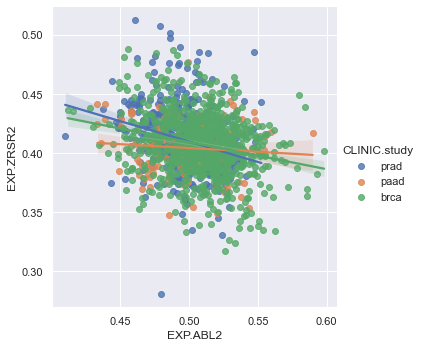

In [77]:
sns.lmplot(x="EXP.ABL2", y="EXP.ZRSR2", hue="CLINIC.study", data=df)

# 3. ACP

In [78]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["CLINIC.study"] = ord_enc.fit_transform(df[["CLINIC.study"]])
df["CLINIC.study"]

1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
       ... 
1452    2.0
1453    2.0
1454    2.0
1455    2.0
1456    2.0
Name: CLINIC.study, Length: 1456, dtype: float64

Cumulative Variances (Percentage):
[31.889892   42.70515154 50.70860781 54.75198258 58.29876804 60.51973682
 62.35101433 63.83345305 65.14940966 66.35697954 67.40177628 68.22476228
 69.04033927 69.7393076  70.39139901 70.99661978 71.59717082 72.1761797
 72.71888877 73.2233033  73.68685622 74.14527579 74.57391037 74.99753295
 75.40039419 75.79665889 76.17874226]
Number of components: 27


Text(0, 0.5, 'Explained variance (%)')

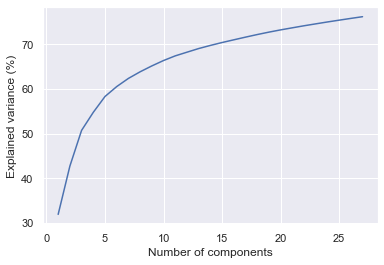

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.76)
pca.fit(X)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [80]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.00459428 0.00582896 0.02729635 ... 0.04520036 0.03535924 0.00180165]
 [0.08125576 0.00660668 0.00054972 ... 0.04582836 0.01856574 0.00230118]
 [0.03721601 0.00829071 0.02152522 ... 0.05779971 0.02332425 0.01191733]
 ...
 [0.00245833 0.00130344 0.02039263 ... 0.02826765 0.00827466 0.014681  ]
 [0.04561825 0.0061193  0.00702863 ... 0.0149009  0.09194864 0.0071252 ]
 [0.01365255 0.00216643 0.0051613  ... 0.05205913 0.00328579 0.00511382]]


In [81]:
print('Top 2 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 2)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:2]
    
    # print the top 2 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 2 most important features in each component
Component 0: ['EXP.KLF6', 'EXP.SLC34A2']
Component 1: ['EXP.ERG', 'EXP.FNBP1']
Component 2: ['EXP.IL21R', 'EXP.APOBEC3B']
Component 3: ['EXP.ERG', 'EXP.RUNX1T1']
Component 4: ['EXP.CD74', 'EXP.TCF7L2']
Component 5: ['EXP.WDCP', 'EXP.SKI']
Component 6: ['EXP.COL1A1', 'EXP.RUNX1T1']
Component 7: ['EXP.COL1A1', 'EXP.SKI']
Component 8: ['EXP.MUC16', 'EXP.BLM']
Component 9: ['EXP.COL1A1', 'EXP.HOXA9']
Component 10: ['EXP.HOXA9', 'EXP.PTPRK']
Component 11: ['EXP.RUNX1T1', 'EXP.COL1A1']
Component 12: ['EXP.COL1A1', 'EXP.RNF43']
Component 13: ['EXP.RUNX1T1', 'EXP.CNOT3']
Component 14: ['EXP.SKI', 'EXP.CNOT3']
Component 15: ['EXP.REL', 'EXP.MUC1']
Component 16: ['EXP.FAM131B', 'EXP.RUNX1T1']
Component 17: ['EXP.CNOT3', 'EXP.COL1A1']
Component 18: ['EXP.WRN', 'EXP.BLM']
Component 19: ['EXP.NPM1', 'EXP.SKI']
Component 20: ['EXP.SKI', 'EXP.RNF43']
Component 21: ['EXP.MUC1', 'EXP.CNOT3']
Component 22: ['EXP.LRIG3', 'EXP.PAX5']
Component 23: ['EXP.LRIG

In [82]:
X_pca = pca.transform(X)
print(X_pca.shape)
print(X_pca)

(1456, 27)
[[ 1.69719159 -0.37709831  0.28399733 ... -0.13780925  0.03774096
   0.02071257]
 [ 1.40412188 -0.32863139  0.15856271 ... -0.05276955  0.23619412
  -0.05413945]
 [ 1.37411295 -0.40571063 -0.30422259 ...  0.04911947 -0.05260033
  -0.04586997]
 ...
 [ 0.96020123  0.2194035   0.29264279 ... -0.03243761  0.42490319
   0.20459818]
 [ 1.39757151 -0.58885836  0.50051194 ...  0.01874916 -0.24886891
   0.07406984]
 [ 1.25635354  0.02709691  0.2269295  ... -0.07614607 -0.19320484
   0.12230932]]


In [83]:
df['pca-one'] = X_pca[:,0]
df['pca-two'] = X_pca[:,1] 
df['pca-three'] = X_pca[:,2]

In [84]:
df['pca-one']

1       1.697192
2       1.404122
3       1.374113
4       1.601126
5       1.543551
          ...   
1452    1.030745
1453    1.036978
1454    0.960201
1455    1.397572
1456    1.256354
Name: pca-one, Length: 1456, dtype: float64

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

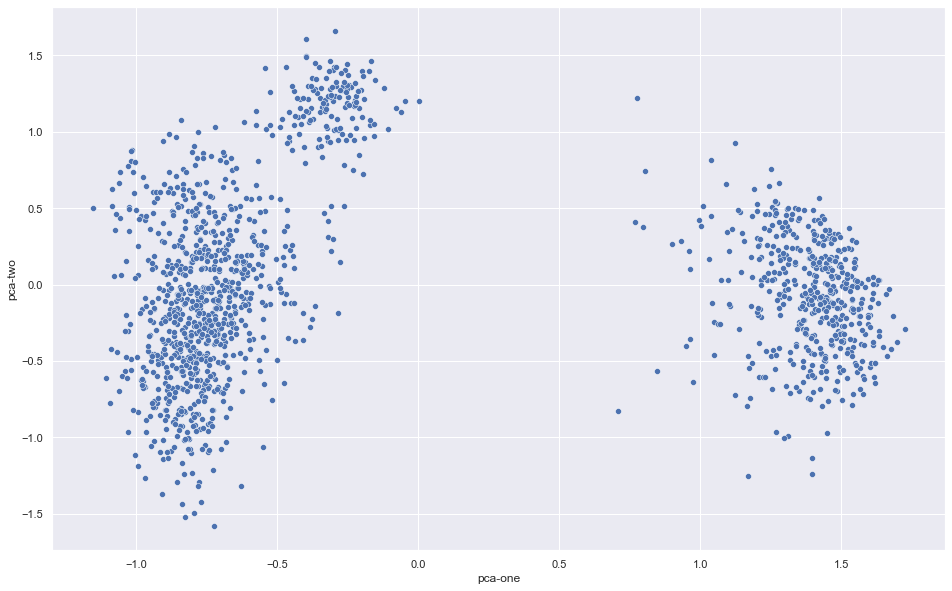

In [85]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df['pca-one'], y=df['pca-two'],
    data=X_pca,
    legend="full",
)

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

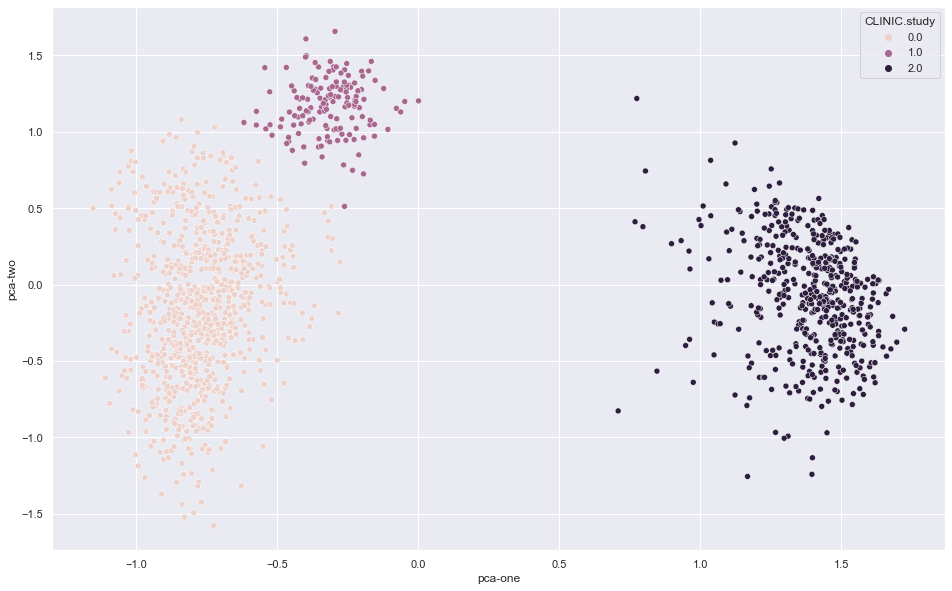

In [86]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df['pca-one'], y=df['pca-two'],
    hue=df['CLINIC.study'],
    data=X_pca,
    legend="full",
)

<AxesSubplot:xlabel='pca-three', ylabel='pca-two'>

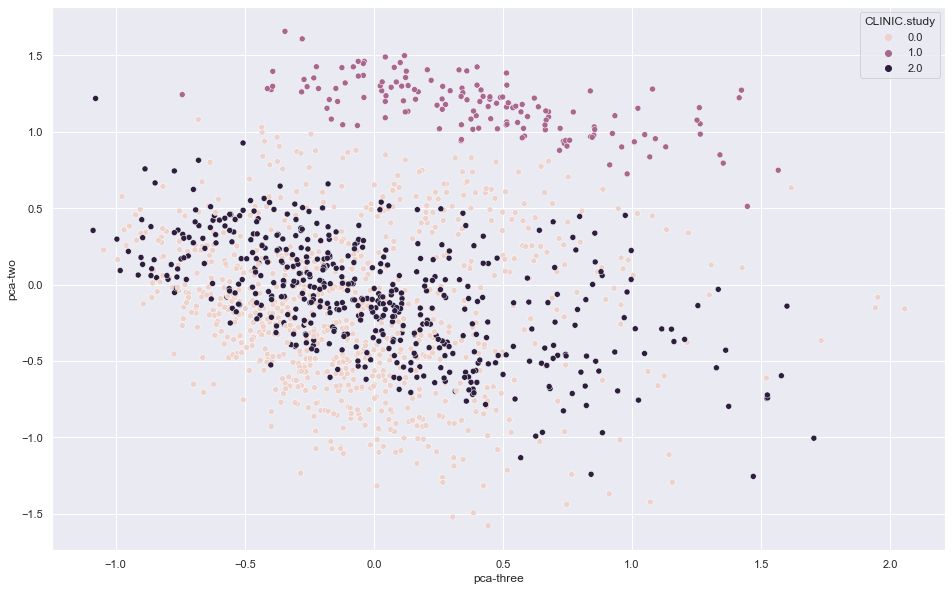

In [87]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df['pca-three'], y=df['pca-two'],
    hue=df['CLINIC.study'],
    data=X_pca,
    legend="full",
)

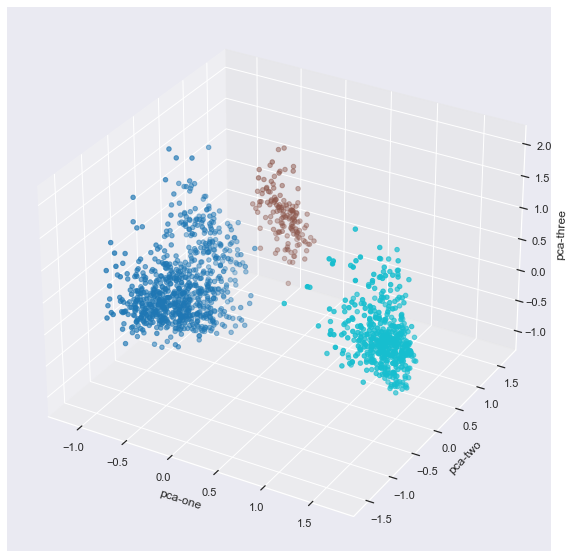

In [88]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    zs=df['pca-three'] ,
    xs=df['pca-one'], 
    ys=df['pca-two'] ,
    c=df['CLINIC.study'], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()